# Regresja liniowa

Naszym Celem jest empityczne sprawdzenie twierdzenia:

Niech $A \in \mathbb{R}^{N\times K}$ będzie macierzą która przekształca $\mathbb{R}^{K}$ w $\mathbb{R}^N$, i niech $y \in \mathbb{R}^{K}$.

Wtedy punkt $x_0 \in \mathbb{R}^K$ spełnia

$$
x_0 = \mathrm{argmin} \{ x \in \mathbb{R}^K   \colon \| Ax - y \|^2 \}
$$

wtedy i tylko wtedy gdy

$$
A^TA x_0 = A^Ty.
$$


In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

Proszę wykres funkcji w kształcie 

$
f(x)=x^2
$ 

na odcinku $[0,3]$ i go narysować.

Będzie to model, który będziemy chcieli znaleźć.

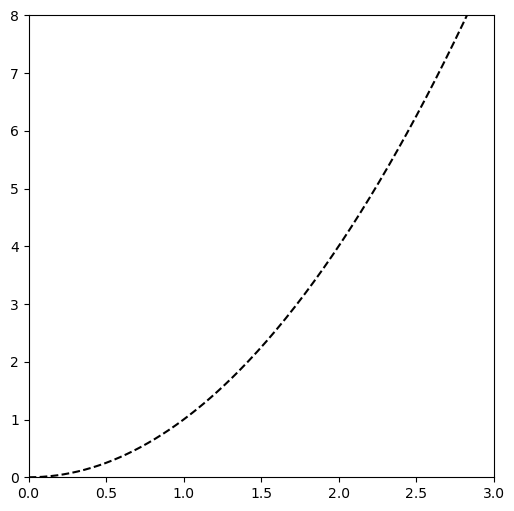

In [5]:
f = lambda x: (x**2)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)=x^2$.

Na ich podstawie będziemy wykonywać naszej presykcji.

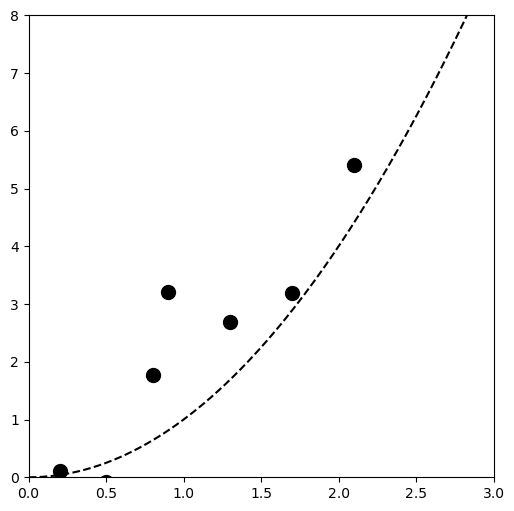

In [6]:
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [13]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y);
print(lr.coef_)
print(lr.intercept_)

[3.08863418]
-0.8764696846608855


Definiujemy naszą funkcję regresji

In [5]:
f_lr = lambda x: lr.coef_ * x + lr.intercept_

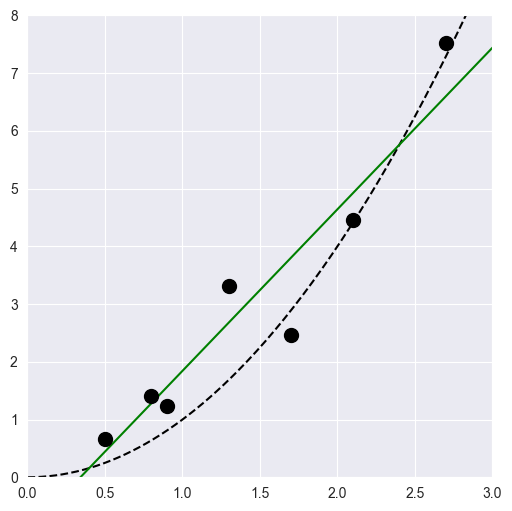

In [6]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Teraz możemy wykonać predykcję dla punktu 
$$
x_0 = 1.5
$$

In [7]:
point = np.array([1.5])
y_point = lr.predict(point[:, np.newaxis])

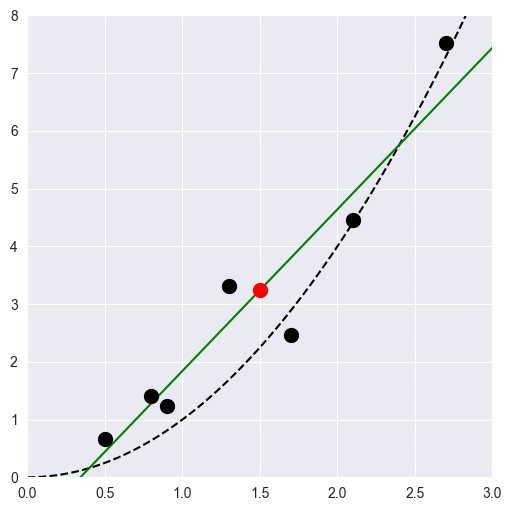

In [8]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.plot(point, y_point, 'or', ms=10);
plt.show()

Możemy wypisać miarę dopasowania $R^2$. Narazie nie wnikamy w to co ona oznacza.

In [9]:
from sklearn.metrics import r2_score
print(lr.score(x[:, np.newaxis], y))
print(r2_score(lr.predict(x[:, np.newaxis]), y))

0.918793257167428
0.9116158698389598


# Zadanie 1
Stwórz macierz postaci:
$$
A=\begin{bmatrix}
x_1 & 1\\
\ddots & \ddots\\
x_n & 1\\
\end{bmatrix}
$$

i rozwiąż równanie

$$
A^TA x = A^Ty.
$$

gdzie (x,y) to nasz zbiór treningowy. 

Użyj funkcji <tt>linalg.solve</tt>.

In [20]:
deg=1
A =  np.vander(x, deg + 1)
A

array([[0.2, 1. ],
       [0.5, 1. ],
       [0.8, 1. ],
       [0.9, 1. ],
       [1.3, 1. ],
       [1.7, 1. ],
       [2.1, 1. ],
       [2.7, 1. ]])

In [30]:
x = np.linalg.solve(A.T @ A, A.T @ y)
x

array([ 3.08863418, -0.87646968])

In [35]:
np.allclose(np.dot(A.T @ A, x), A.T @ y)

True

# Zadanie 2
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [52]:
from scipy import optimize

def f(x, y):
    return (x + 1)**2 + y**2

x0 = np.asarray((0,0))
min_point = optimize.fmin_cg(lambda params: f(*params), x0)
print(f"min x,y: {min_x}, val: {f(*min_point)}") 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3
min x,y: [-1.00000001e+00 -7.45058060e-09], val: 1.0884248543935769e-16


# Zadanie 3
Zdefiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error}(a,b;(x,y)) =  \sum_{i=1}^{n} ( y_i - (ax_i+b) )^2.
$$

In [83]:
def compute_error_l2(a, b, data):
    x, y = data[:, 0], data[:, 1]
    return np.sum(np.power(y -  (a * x + b), 2))

# Zadanie 4
Zminimalizuj funkcją $\mathrm{compute\_error}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [92]:
f = lambda x: (x**2)
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))

data = np.column_stack((x,y))
x0 = np.asarray((0,0))
a, b = optimize.fmin_cg(lambda params: compute_error_l2(*params, data), x0)

Optimization terminated successfully.
         Current function value: 6.745929
         Iterations: 3
         Function evaluations: 18
         Gradient evaluations: 6


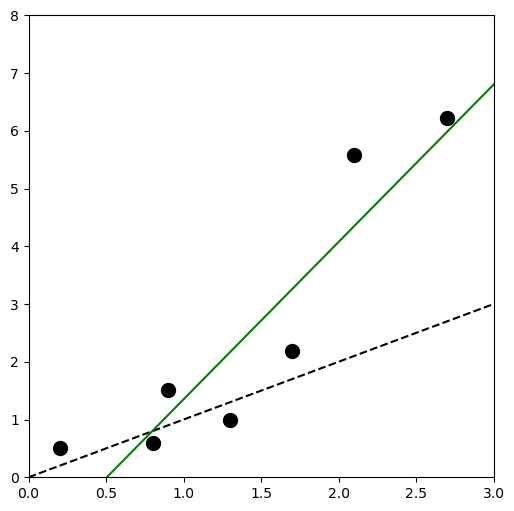

In [94]:
f_lr = lambda x: a * x + b
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr(x_tr)

plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie 5
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error\_1}(a,b;(x,y)) =  \sum_{i=1}^{n} |y_i - (ax_i+b)|.
$$

In [95]:
def compute_error_l1(a, b, data):
    x, y = data[:, 0], data[:, 1]
    return np.sum(np.absolute(y -  (a * x + b)))

# Zadanie 6
Zminimalizuj funkcją $\mathrm{compute\_error\_1}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [96]:
f = lambda x: (x**2)
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))

data = np.column_stack((x,y))
x0 = np.asarray((0,0))
a, b = optimize.fmin_cg(lambda params: compute_error_l1(*params, data), x0)

         Current function value: 11.301596
         Iterations: 1
         Function evaluations: 142
         Gradient evaluations: 46


/opt/miniconda3/envs/env1/lib/python3.12/site-packages/scipy/optimize/_optimize.py:1764: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, c1=c1, c2=c2,


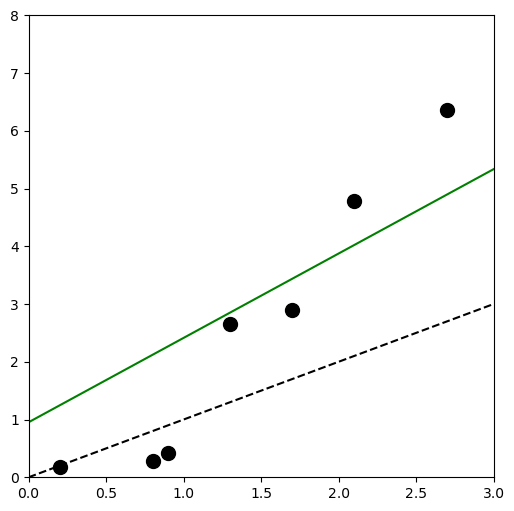

In [97]:
f_lr = lambda x: a * x + b
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr(x_tr)

plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie 7
Wykonaj dwie powyższe regresję na danych z wartością odstającą.


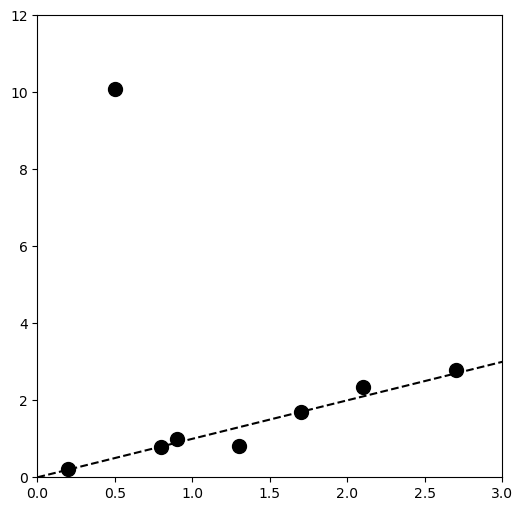

In [99]:
f = lambda x: (x)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))/5
y[1] = y[1]+10

plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,12])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

In [100]:
points = np.column_stack((x,y))

In [118]:
# L1

x0 = np.asarray((0,0))
a1, b1 = optimize.fmin_cg(lambda params: compute_error_l1(*params, points), x0)
a1, b1

         Current function value: 11.653377
         Iterations: 1
         Function evaluations: 177
         Gradient evaluations: 57


/opt/miniconda3/envs/env1/lib/python3.12/site-packages/scipy/optimize/_optimize.py:1764: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, c1=c1, c2=c2,


(0.794721952944451, 0.6233113327288047)

In [124]:
# L2

x0 = np.asarray((0,0))
a2, b2 = optimize.fmin_cg(lambda params: compute_error_l2(*params, points), x0)
a2, b2

Optimization terminated successfully.
         Current function value: 70.568146
         Iterations: 6
         Function evaluations: 60
         Gradient evaluations: 20


(-0.4282186406347405, 3.009766353736296)

In [125]:
# using LinearRegression

#lr = lm.LinearRegression()
lr.fit(x[:, np.newaxis], y)
a3, b3 = lr.coef_, lr.intercept_
a3, b3

(array([-0.42821853]), 3.0097662704073005)

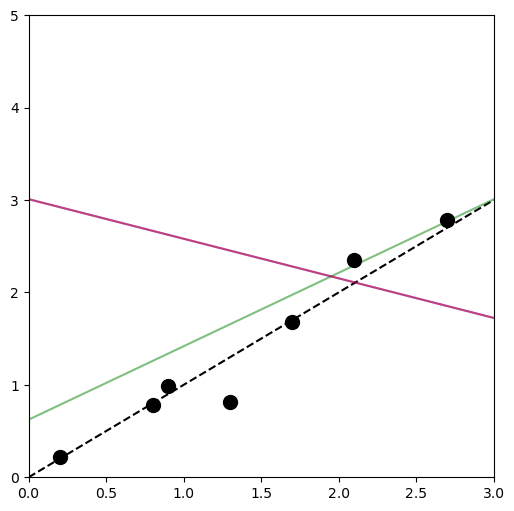

In [131]:
x_f_lr = np.linspace(0., 3, 200)
f_lr1 = lambda x: a1 * x + b1
f_lr2 = lambda x: a2 * x + b2
f_lr3 = lambda x: a3 * x + b3

plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,5])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, f_lr1(x_tr), 'g', alpha=0.5);
plt.plot(x_f_lr, f_lr2(x_tr), 'b', alpha=0.5);
plt.plot(x_f_lr, f_lr3(x_tr), 'r', alpha=0.5);
plt.plot(x, y, 'ok', ms=10);
plt.show()